In [36]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
%matplotlib inline
sns.set_style('white')

In [37]:
# Load the data again. Keep air quality data, drop the index column
# and any missing data columns.
df = pd.read_csv(
    'https://vincentarelbundock.github.io/Rdatasets/csv/ISLR/Default.csv'
).iloc[:,1:].dropna()

print(df.head())

# Recode strings to numeric.
df['default'] = np.where(df['default']=='Yes', 1, 0)
df['student'] = np.where(df['student']=='Yes', 1, 0)
names = df.columns
df = pd.DataFrame(preprocessing.scale(df), columns=names)
print(df.head())
# Define the training and test sizes.
trainsize = int(df.shape[0] / 2)
df_test = df.iloc[trainsize:, :].copy()
df_train = df.iloc[:trainsize, :].copy()

Y_train = df_train['income'].values.reshape(-1, 1)
X_train = df_train.loc[:, ~(df_train.columns).isin(['income'])]

# Make some new features to capture potential quadratic and cubic
# relationships between solar radiation and day or temperature.
df_train['balance_student'] = df_train['balance'] * df_train['student']
df_train['balance_default'] = df_train['balance'] * df_train['default']
df_train['student_default'] = df_train['student'] * df_train['default']
df_train['balance_sqrt'] = (df_train['balance'] + 100) ** .5
df_train['balance2'] = (df_train['balance'] + 100) ** 2
df_train['balance3'] = (df_train['balance'] + 100) ** 3

X_train2 = df_train.loc[:, ~(df_train.columns).isin(['income'])]

# Test the simpler model with smaller coefficients.
Y_test = df_test['income'].values.reshape(-1, 1)
X_test = df_test.loc[:, ~(df_test.columns).isin(['income'])]

# Test the more complex model with larger coefficients.
df_test['balance_student'] = df_test['balance'] * df_test['student']
df_test['balance_default'] = df_test['balance'] * df_test['default']
df_test['student_default'] = df_test['student'] * df_test['default']
df_test['balance_sqrt'] = (df_test['balance'] + 100) ** .5
df_test['balance2'] = (df_test['balance'] + 100) ** 2
df_test['balance3'] = (df_test['balance'] + 100) ** 3
X_test2 = df_test.loc[:, ~(df_test.columns).isin(['income'])]


  default student      balance        income
0      No      No   729.526495  44361.625074
1      No     Yes   817.180407  12106.134700
2      No      No  1073.549164  31767.138947
3      No      No   529.250605  35704.493935
4      No      No   785.655883  38463.495879
    default   student   balance    income
0 -0.185599 -0.645936 -0.218835  0.813187
1 -0.185599  1.548141 -0.037616 -1.605496
2 -0.185599 -0.645936  0.492410 -0.131212
3 -0.185599 -0.645936 -0.632893  0.164031
4 -0.185599 -0.645936 -0.102791  0.370915


In [38]:
# Small number of parameters.
lass = linear_model.Lasso(alpha=.35)
lassfit = lass.fit(X_train, Y_train)
print('R² for the model with few features:')
print(lass.score(X_train, Y_train))
origparams = np.append(lassfit.coef_, lassfit.intercept_)
print('\nParameter estimates for the model with few features:')
print(origparams)

# Large number of parameters.
lassBig = linear_model.Lasso(alpha=.35)
lassBig.fit(X_train2, Y_train)
print('\nR² for the model with many features:')
print(lassBig.score(X_train2, Y_train))
origparams = np.append(lassBig.coef_, lassBig.intercept_)
print('\nParameter estimates for the model with many features:')
print(origparams)

R² for the model with few features:
0.450062579301185

Parameter estimates for the model with few features:
[-0.         -0.40657726 -0.          0.00114596]

R² for the model with many features:
0.44363376712897096

Parameter estimates for the model with many features:
[ 0.00000000e+00 -3.89351238e-01  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -2.77688887e-04
 -7.09158792e-07  3.48711577e+00]


[0.5739722663409603, 0.5739720657073781, 0.5739717725978684, 0.5739714114491319, 0.5739710008243512, 0.5739705549007033, 0.5739700845518103, 0.5739695981427944, 0.5739691021195747]


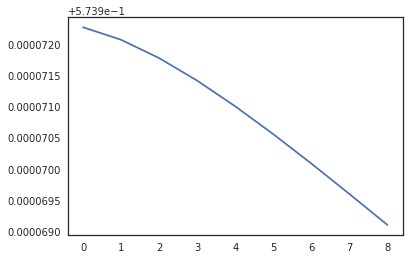

In [39]:
#create a for loop to go through the lambda values for ridge on the x_train2 feature set 
ridge_scores =[]
lam = np.arange(.1, 1, .1)
for i in lam:
    ridge = linear_model.Ridge(alpha=i, fit_intercept = False)
    ridge.fit(X_train2, Y_train)
    rscore = ridge.score(X_train2, Y_train)
    ridge_scores.append(rscore)
print(ridge_scores)
plt.plot(ridge_scores);

[0.5630894936716484, 0.5312352331355782, 0.4781445089581402, 0.403814855530392, 0.3082496073309634, 0.1914467410568791, 0.053407814340633464, 0.026834134749037727, 0.026834134561415365]


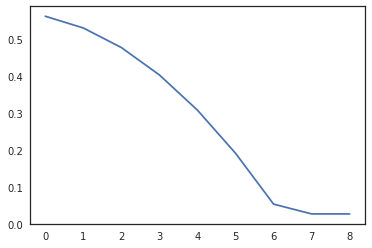

In [35]:
#now go through a loop for lasso lambda values for the same feature set to compare 
lass_scores =[]
for i in lam:
    lassBig = linear_model.Lasso(alpha=i)
    lassBig.fit(X_train2, Y_train)
    rscore = lassBig.score(X_train2, Y_train)
    lass_scores.append(rscore)
print(lass_scores)
plt.plot(lass_scores);

Looks like the variance remains the same amongst our ridge regression, while in our lasso regression significantly decreases the variance portrayed in the model as lambda increases. Essentially, lasso regression can exclude useless variables from equations, so it's better at reducing model variance in models with lots of useless variabels. However, ridge regression can be better when most variables are useful.  